# Impor Pustaka (Library)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

sns.set(style="whitegrid")

# Memuat dan Menyiapkan Data

In [19]:
try:
    df = pd.read_csv('data_ipk.csv')
except FileNotFoundError:
    print("File 'data_ipk.csv' tidak ditemukan. Mohon upload file terlebih dahulu.")
    exit()

features = ['IPK Offline', 'IPK Online']
X = df[features]

# Pra-pemrosesan Data (Scaling)

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan Jumlah Cluster (K) Optimal

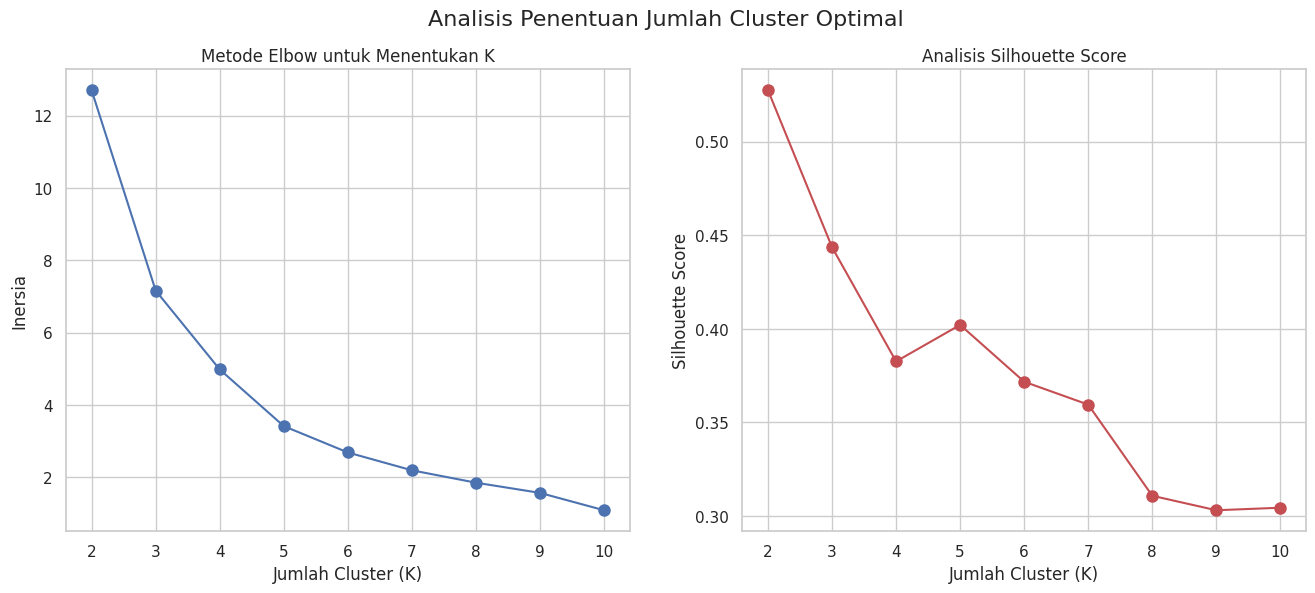

In [21]:
k_range = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(X_scaled)
    inertia_values.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_model.labels_))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(k_range, inertia_values, 'bo-', markersize=8)
ax1.set_xlabel('Jumlah Cluster (K)')
ax1.set_ylabel('Inersia')
ax1.set_title('Metode Elbow untuk Menentukan K')

ax2.plot(k_range, silhouette_scores, 'ro-', markersize=8)
ax2.set_xlabel('Jumlah Cluster (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Analisis Silhouette Score')

plt.suptitle('Analisis Penentuan Jumlah Cluster Optimal', fontsize=16)
plt.show()

optimal_k = 3

# Melatih Model K-Means

In [22]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

# Visualisasi Hasil Clustering

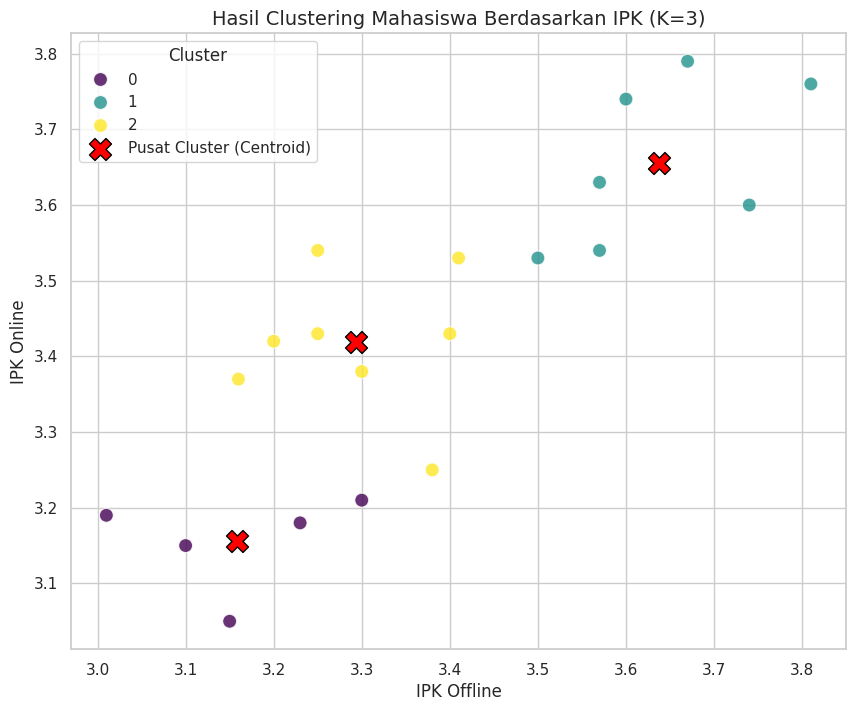

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='IPK Offline', y='IPK Online', hue='Cluster', palette='viridis', s=100, alpha=0.8)

centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=250, marker='X', c='red', edgecolor='black', label='Pusat Cluster (Centroid)')

plt.title(f'Hasil Clustering Mahasiswa Berdasarkan IPK (K={optimal_k})', fontsize=14)
plt.xlabel('IPK Offline')
plt.ylabel('IPK Online')
plt.legend(title='Cluster')
plt.show()

# Evaluasi Model

In [24]:
print("--- ANALISIS & INTERPRETASI HASIL CLUSTERING ---\n")

final_silhouette_score = silhouette_score(X_scaled, cluster_labels)
print(f"Kualitas Cluster (Silhouette Score): {final_silhouette_score:.4f}")
print("Skor ini menunjukkan bahwa cluster yang terbentuk cukup padat dan terpisah satu sama lain (semakin mendekati 1, semakin baik).\n")

print("Karakteristik Setiap Cluster (berdasarkan IPK rata-rata):")
cluster_characteristics = df.groupby('Cluster')[['IPK Offline', 'IPK Online']].mean().round(2)
print(cluster_characteristics)
print("\n")

cluster_personas = {
    0: "Mahasiswa Berprestasi Tinggi (IPK Offline & Online tinggi)",
    1: "Mahasiswa dengan Performa Cukup (IPK Offline & Online sedang-rendah)",
    2: "Mahasiswa Berprestasi Sedang (IPK Offline & Online di tengah)"
}

print("Deskripsi Persona untuk Setiap Cluster:")
for cluster_num, persona in cluster_personas.items():
    print(f"   - Cluster {cluster_num}: {persona}")
print("\n" + "="*50 + "\n")

--- ANALISIS & INTERPRETASI HASIL CLUSTERING ---

Kualitas Cluster (Silhouette Score): 0.4436
Skor ini menunjukkan bahwa cluster yang terbentuk cukup padat dan terpisah satu sama lain (semakin mendekati 1, semakin baik).

Karakteristik Setiap Cluster (berdasarkan IPK rata-rata):
         IPK Offline  IPK Online
Cluster                         
0               3.16        3.16
1               3.64        3.66
2               3.29        3.42


Deskripsi Persona untuk Setiap Cluster:
   - Cluster 0: Mahasiswa Berprestasi Tinggi (IPK Offline & Online tinggi)
   - Cluster 1: Mahasiswa dengan Performa Cukup (IPK Offline & Online sedang-rendah)
   - Cluster 2: Mahasiswa Berprestasi Sedang (IPK Offline & Online di tengah)




# Prediksi untuk Data Baru

In [25]:
print("--- PREDIKSI UNTUK DATA MAHASISWA BARU ---\n")

data_baru_raw = [
    [3.1, 3.2],  # Mahasiswa A
    [3.9, 3.8],  # Mahasiswa B
    [2.8, 2.9]   # Mahasiswa C
]

data_baru_df = pd.DataFrame(data_baru_raw, columns=features)

data_baru_scaled = scaler.transform(data_baru_df)
prediksi_cluster = kmeans.predict(data_baru_scaled)

for i, data in enumerate(data_baru_raw):
    cluster_id = prediksi_cluster[i]
    cluster_persona = cluster_personas.get(cluster_id, "Deskripsi tidak ditemukan")
    print(f"Mahasiswa dengan IPK [Offline: {data[0]}, Online: {data[1]}]")
    print(f"    diprediksi masuk ke: Cluster {cluster_id} ({cluster_persona})\n")

--- PREDIKSI UNTUK DATA MAHASISWA BARU ---

Mahasiswa dengan IPK [Offline: 3.1, Online: 3.2]
    diprediksi masuk ke: Cluster 0 (Mahasiswa Berprestasi Tinggi (IPK Offline & Online tinggi))

Mahasiswa dengan IPK [Offline: 3.9, Online: 3.8]
    diprediksi masuk ke: Cluster 1 (Mahasiswa dengan Performa Cukup (IPK Offline & Online sedang-rendah))

Mahasiswa dengan IPK [Offline: 2.8, Online: 2.9]
    diprediksi masuk ke: Cluster 0 (Mahasiswa Berprestasi Tinggi (IPK Offline & Online tinggi))

